<a href="https://colab.research.google.com/github/MishkaPaucs/TestRepository/blob/master/Diabetes_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
dataset = pd.read_csv('Healthcare-Diabetes.csv')

# Display the first few rows
print(dataset.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# displaying basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [4]:
#  Displaying summary statistics
print(dataset.describe())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

Note that we have some strange results mixed in the data. It is impossible for someone to have 0 BMI, skin thickness or blood pressure, and it is very unlikely that the blood glucose content to reach 0 (this is a fatal condition). Normally, we will need to double check the source of the data. But in this notebook, we shall eliminate them instead.

In [5]:
# Checking for missing values
print(dataset.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


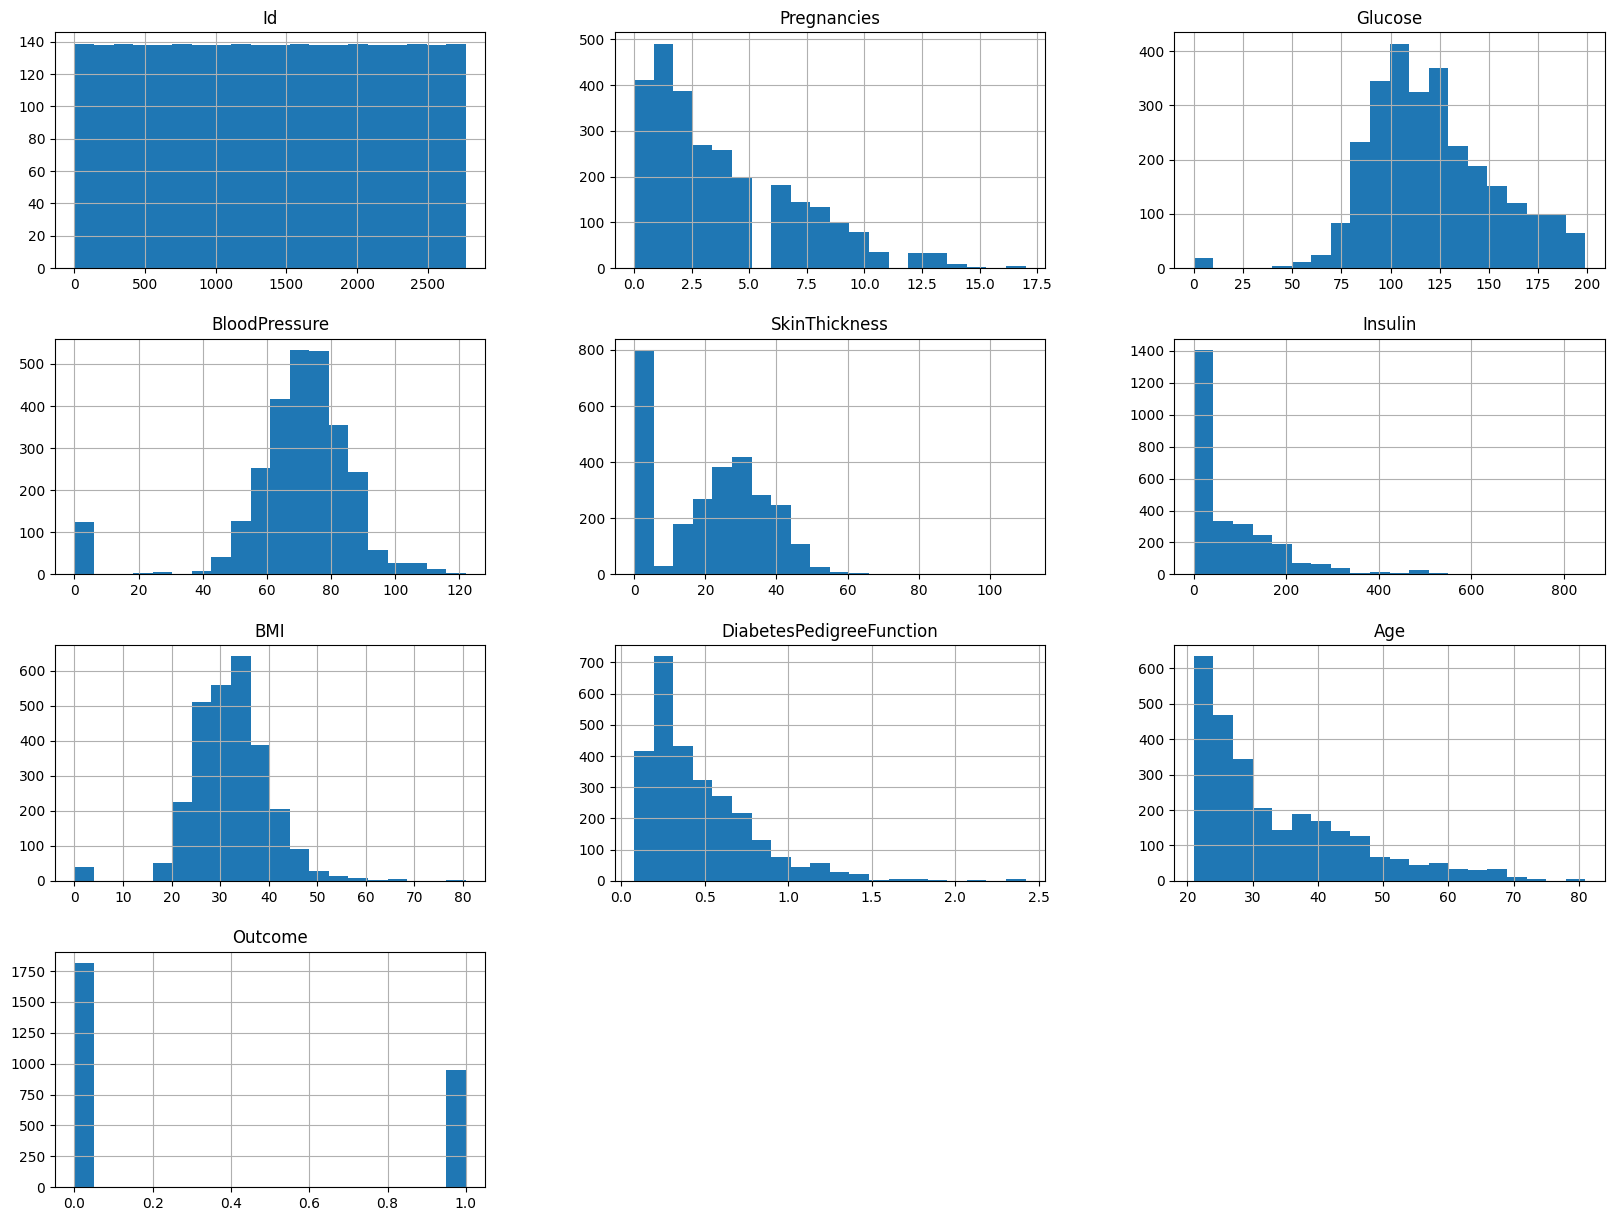

In [6]:
# Using Histogram of all features
import matplotlib.pyplot as plt
dataset.hist(bins=20, figsize=(20, 15))
plt.show()

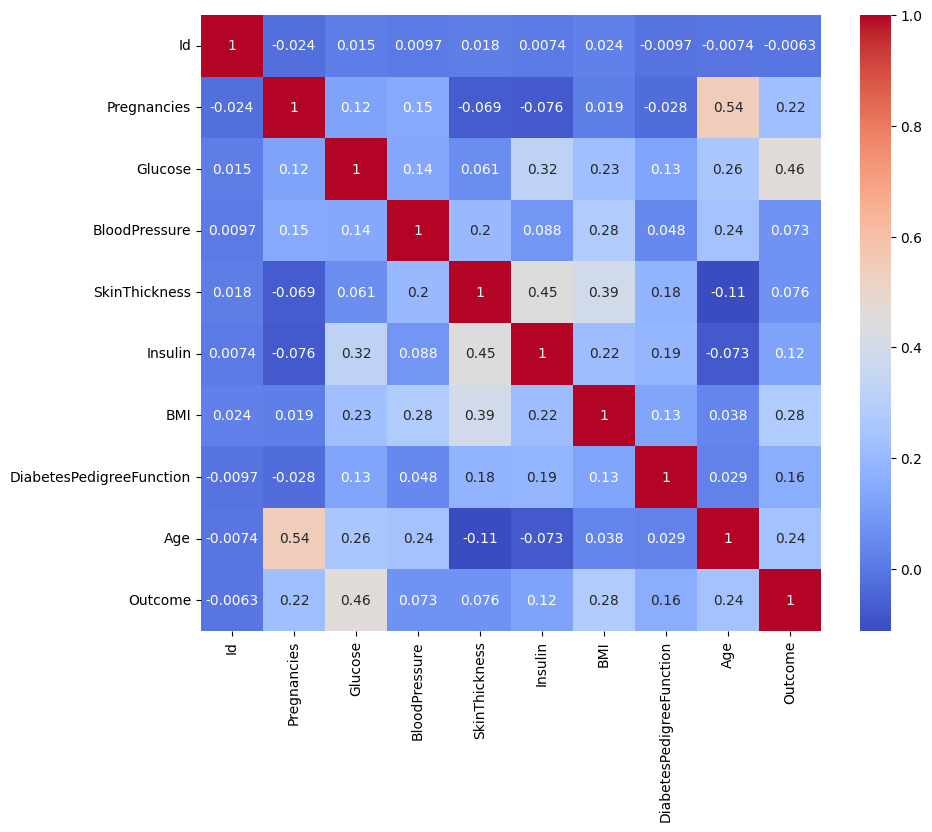

In [7]:
# Correlation heat map
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

Looking at the correlation between Outcome and other factors, we notice that patients with higher Glucose content, BMI values or older Age might have a higher chance at having Diabetes. Surprisingly, DiabetesPedigreeFunction does not have high correlation with Outcome.

In [9]:
# Handling missing values
dataset.fillna(dataset.mean(), inplace=True)

In [48]:
# Checking if we had duplicates
print(dataset.duplicated().sum())

0


In [46]:
# Define the columns where 0 values should be replaced
columns_to_replace = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Replace 0 values in the specified columns with the mean of the column
for column in columns_to_replace:
    # Calculate the mean of the column
    column_mean = dataset[column].mean()

    # Replace 0 values with the mean
    dataset[column] = dataset[column].apply(lambda x: column_mean if x == 0 else x)


In [10]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset.drop('Outcome', axis=1))

In [11]:
# Convert scaled data back to DataFrame
scaled_dataset = pd.DataFrame(scaled_dataset, columns=dataset.columns[:-1])
scaled_dataset['Outcome'] = dataset['Outcome']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = scaled_dataset.drop('Outcome', axis=1)
y = scaled_dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
RF_pred = model.predict(X_test)
RF_acc = model.score(X_test, y_test)
print("Accuracy: ", RF_acc)

# Evaluate the model
print(confusion_matrix(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

Accuracy:  0.983754512635379
[[365   2]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



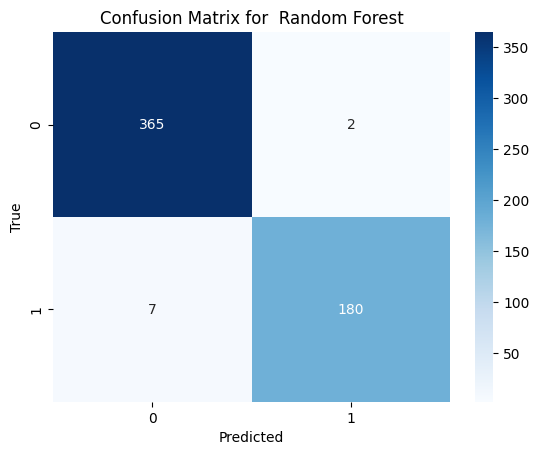

In [42]:
cm1 = confusion_matrix(y_test,RF_pred)
sns.heatmap(cm1,annot=True,cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for  Random Forest")
plt.show()

In [32]:
from sklearn.naive_bayes import GaussianNB


NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
print("Train: ", NB_model.score(X_train , y_train),"Test: ", NB_model.score(X_test , y_test))

NB_pred = NB_model.predict(X_test)
NB_acc = NB_model.score(X_test, y_test)
print("Accuracy: ", NB_acc)

# Evaluate the model
print(confusion_matrix(y_test, NB_pred))
print(classification_report(y_test, NB_pred))

Train:  0.7669376693766937 Test:  0.7671480144404332
Accuracy:  0.7671480144404332
[[314  53]
 [ 76 111]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       367
           1       0.68      0.59      0.63       187

    accuracy                           0.77       554
   macro avg       0.74      0.72      0.73       554
weighted avg       0.76      0.77      0.76       554



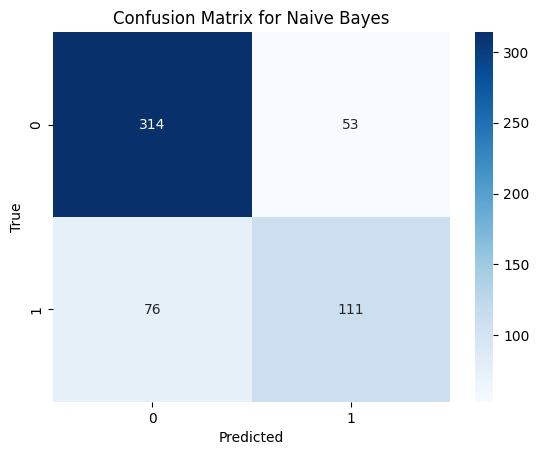

In [43]:
cm2 = confusion_matrix(y_test,NB_pred)
sns.heatmap(cm2,annot=True,cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print("k-NN Accuracy:")
print("Train: ", knn.score(X_train , y_train),"Test: ", knn.score(X_test , y_test))

KNN_pred = knn.predict(X_test)
KNN_acc = knn.score(X_test, y_test)
print("Accuracy: ", KNN_acc)

# Evaluate the model
print(confusion_matrix(y_test, KNN_pred))
print(classification_report(y_test, KNN_pred))


k-NN Accuracy:
Train:  0.8066847335140018 Test:  0.7942238267148014
Accuracy:  0.7942238267148014
[[334  33]
 [ 81 106]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       367
           1       0.76      0.57      0.65       187

    accuracy                           0.79       554
   macro avg       0.78      0.74      0.75       554
weighted avg       0.79      0.79      0.79       554



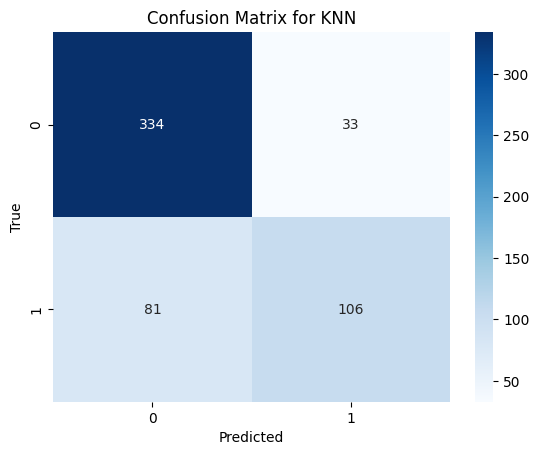

In [44]:
cm3 = confusion_matrix(y_test,KNN_pred)
sns.heatmap(cm3,annot=True,cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)
print("Train: ", DT_model.score(X_train , y_train),"Test: ", DT_model.score(X_test , y_test))

DT_pred = DT_model.predict(X_test)
DT_acc = DT_model.score(X_test, y_test)
print("Accuracy: ", DT_acc)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, DT_pred))
print("Classification Report: ")
print(classification_report(y_test, DT_pred))

Train:  1.0 Test:  0.9638989169675091
Accuracy:  0.9638989169675091
Confusion Matrix: 
[[357  10]
 [ 10 177]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       367
           1       0.95      0.95      0.95       187

    accuracy                           0.96       554
   macro avg       0.96      0.96      0.96       554
weighted avg       0.96      0.96      0.96       554



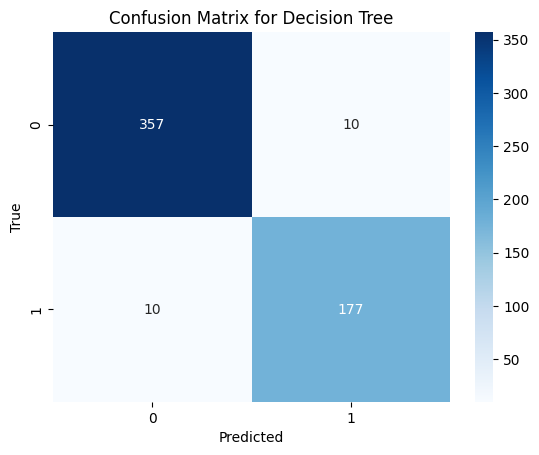

In [38]:
cm4 = confusion_matrix(y_test,DT_pred)
sns.heatmap(cm4,annot=True,cmap='Blues',fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [35]:
models=pd.DataFrame({
    'models':['Decision_Tree','Random_Forest', 'Naive_Bayes', 'KNN'],
    'scores':[DT_acc, RF_acc, NB_acc, KNN_acc]})
models.sort_values(by='scores',ascending=False)

,models,scores
1,Random_Forest,0.983755
0,Decision_Tree,0.963899
3,KNN,0.794224
2,Naive_Bayes,0.767148


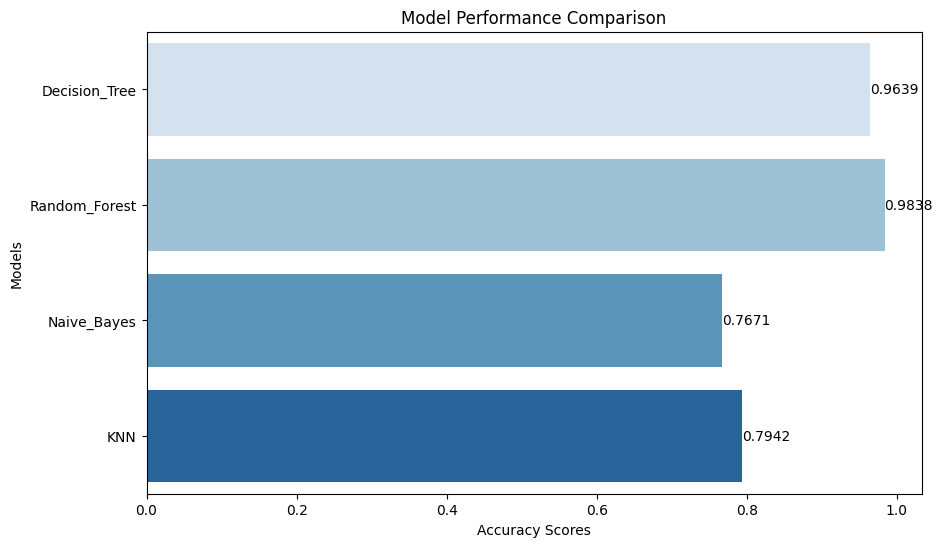

In [37]:
# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='scores', y='models', data=models, palette='Blues', orient='h')

# Add labels and title
plt.xlabel('Accuracy Scores')
plt.ylabel('Models')
plt.title('Model Performance Comparison')

# Add the accuracy values on the bars
for i, score in enumerate(models['scores']):
    plt.text(score, i, f'{score:.4f}', ha='left', va='center')

# Show the plot
plt.show()